# Plant analysis

Plant images classification into 4 different classes from a dataset of Soybean crops.
Only `numpy` library is allowed.

Dataset downloaded from : [Weed Detection in Soybean Crops](https://www.kaggle.com/fpeccia/weed-detection-in-soybean-crops)

### Imports

In [1]:
# System
import os

# Visualization
import matplotlib.pyplot as plt

# Scientific computing
import numpy as np

### Configuration

In [2]:
DATASET_ROOT = 'dataset'
DATASETS = {}

## Data
### Loading

In [3]:
print('Datasets')
labels = os.listdir(DATASET_ROOT)
for label in labels:
    label_directory = os.path.join(DATASET_ROOT, label)
    _, _, DATASETS[label] = next(os.walk(label_directory))
    print('  >', label, ':', len(DATASETS[label]), 'files')

Datasets
  > broadleaf : 1191 files
  > grass : 3520 files
  > soil : 3249 files
  > soybean : 7376 files


### Visualization

  > broadleaf


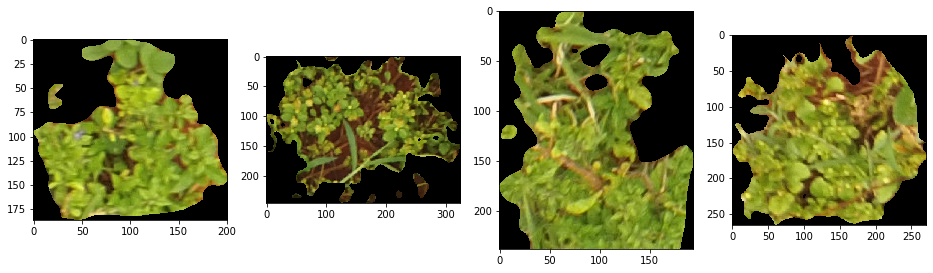

  > grass


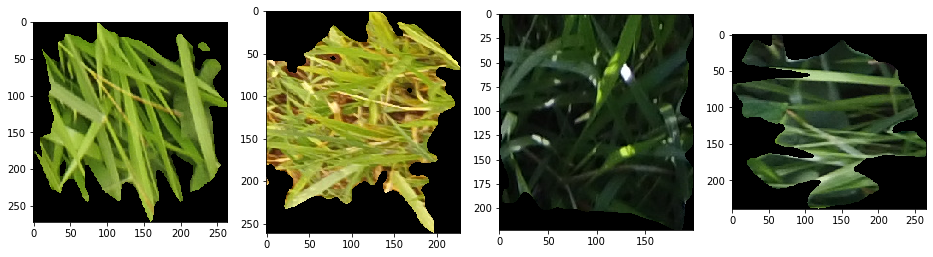

  > soil


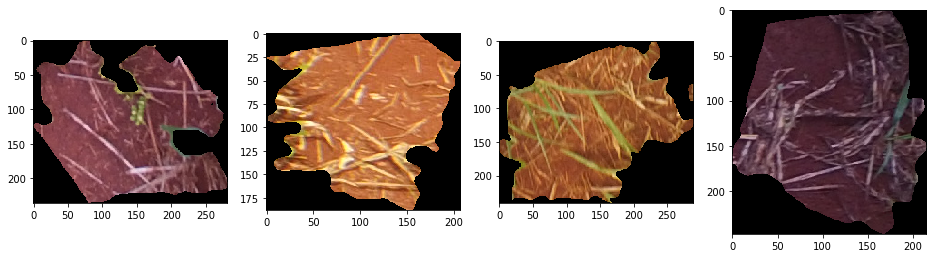

  > soybean


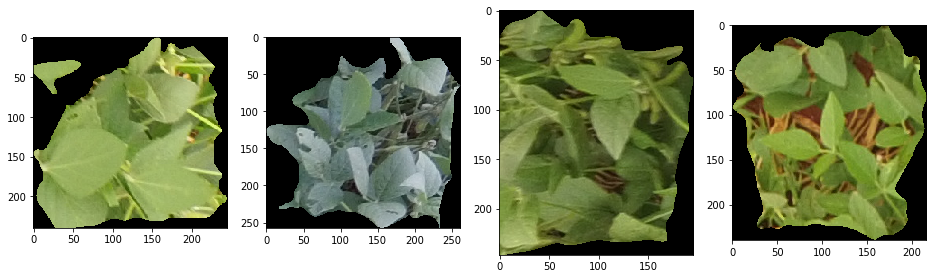

In [4]:
images_per_row = 4
for dataset_name, dataset_files in DATASETS.items():
    dataset_directory = os.path.join(DATASET_ROOT, dataset_name)
    print('  >', dataset_name)
    _, axs = plt.subplots(1, images_per_row, figsize=(16,16))
    images = []
    for i in range(images_per_row):
        image = plt.imread(os.path.join(dataset_directory, dataset_files[i]))
        axs[i].imshow(image)
    plt.show()